# Prova Final

##### Adrià Rojo Mérida, NIUB: 20401021, 25 de gener de 2021

---

## Exercici 1

In [149]:
def demanar_Rt() -> float:
    """
    Demana per pantalla un valor decimal superior o igual a 0
    """
    valid = False
    entrada = None
    
    while not valid: # boolea per marcar si es valid
        try:
            entrada = float(input("Digues un valor de l'Rt que sigui >= 0: "))
            if (entrada < 0):
                print("Un numero inferior a 0 no es vàlid, torna a escriure un numero.")
            else:
                valid = True
        except ValueError:
            print("Valor no valid, torna a escriure un numero.")

    return entrada

In [150]:
demanar_Rt()

Digues un valor de l'Rt que sigui >= 0: a
Valor no valid, torna a escriure un numero.
Digues un valor de l'Rt que sigui >= 0: -5.565
Un numero inferior a 0 no es vàlid, torna a escriure un numero.
Digues un valor de l'Rt que sigui >= 0: 58.563


58.563

### Comentari

Podria haver fet un return en el moment que la entrada es valida pero queda lleig tenir 2 punts de sortida

## Exercici 2

In [78]:
import math

def etapa_COVID(poblacio: list, Rt: float) -> list:
    """
    Simula 10 dies de contagis i afegeix dades a la llista primera llista
    """
    # poblacio[0] -> registre de gent sana sense contagiar
    # poblacio[1] -> registre de gent malalta actualment
    # poblacio[2] -> registre de gent recuperada total
    
    abans_poblacio_contagiada = poblacio[1][-1] # aquests calculs els mana l'enunciat
    poblacio_actual = poblacio[0][-1]
    total_poblacio_recuperada = poblacio[2][-1] 
    contagis = min(math.floor(abans_poblacio_contagiada * Rt), poblacio_actual) # math.floor perque no pots contagiar a mitja persona 
    
    poblacio[0].append(poblacio_actual - contagis)
    poblacio[1].append(contagis)
    poblacio[2].append(abans_poblacio_contagiada + total_poblacio_recuperada) # acumulo els recuperats
    
    return poblacio

In [152]:
poblacio=[[6999999], [1], [0]]
for i in range(3):
    poblacio = etapa_COVID(poblacio, 4)

poblacio 

[[6999999, 6999995, 6999979, 6999915], [1, 4, 16, 64], [0, 1, 5, 21]]

### Comentari

L'enunciat no especifica si les dades de recuperats son acumulatives o puntuals, he optat per ferles acumulatives (aixo  probablement mostrarà un gràfic diferent del que hi ha a l'enunciat).  
Del codi res a comentar ja que és el que mana l'enunciat. Com a molt el puntualitzar l'utilització de index negatiu per accedir a l'ultim element de la llista.

## Exercici 3
### Part 1

Digues un valor de l'Rt que sigui >= 0: 4


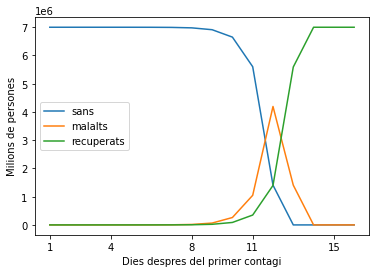

In [153]:
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

DESENES_DIES = 15

rt = demanar_Rt()
poblacio = [[6999999], [1], [0]]

for i in range(DESENES_DIES):
    poblacio = etapa_COVID(poblacio, rt)

x = list(range(1, DESENES_DIES+2)) # les x on es basaran les dades
xbar = np.linspace(1, DESENES_DIES, 5, dtype=np.int) # les marques de l'eix de les x


plt.plot(x, poblacio[0], label="sans")
plt.plot(x, poblacio[1], label="malalts")
plt.plot(x, poblacio[2], label="recuperats")

plt.legend() # mostra llegenda
plt.ylabel("Milions de persones")
plt.xlabel("Dies despres del primer contagi")
plt.xticks(xbar) # mostra les x com jo vull

plt.show()

### Comentari

El `help(plt.legend)` marcava les possibles formes de veure la llegenda a la grafica.  
Utilitzo `np.linspace` per posar les marques a la part inferior del grafic.  

Per alguna rao l'eix de les y es mostra amb una escala de 1e6 (milions), he provat de buscar amb `help(plt.xscale)` i em redirigia al `help(matplotlib.scale.LinearScale)` on no he pogut trobar més i he optat per marcar-ho explicitament a la etiqueta de les y.

### Part 2

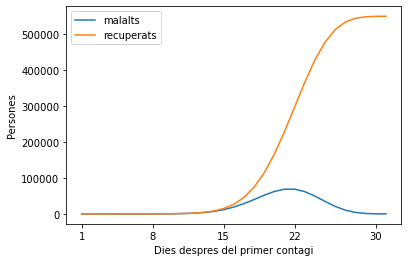

In [154]:
poblacio = [[6999999], [1], [0]]
rt = 2

acc_dies = 0
while rt > 0:
    poblacio = etapa_COVID(poblacio, rt)
    acc_dies += 1
    if (acc_dies > 10): # passats els 100 dies (10 desenes)
        rt -= 0.1

x = list(range(1, acc_dies+2))
xbar = np.linspace(1, acc_dies, 5, dtype=np.int)

plt.plot(x, poblacio[1], label="malalts")
plt.plot(x, poblacio[2], label="recuperats")

plt.legend()
plt.ylabel("Persones")
plt.xlabel("Dies despres del primer contagi")
plt.xticks(xbar)

plt.show()

### Comentari

Aqui només he seguit les ordres de l'enunciat. Els comentaris son els mateixos que els de la Part 1

## Exercici 4

In [155]:
def escriure_simulacio(dades: list) -> None:
    """
    Guarda les dades de la simulacio a un fitxer
    """
    nom_fitxer = input("Nom del fitxer per guardar dades: ")
    with open(nom_fitxer, "w") as file:
        for tupl in zip(*dades):
            file.write(",".join([str(a) for a in tupl]) + "\n")

def llegir_simulacio() -> list:
    """
    Llegeix les dades de la simulacio guardades en un fitxer
    """
    nom_fitxer = input("Nom del fitxer per llegir dades: ")
    dades = [[], [], []]
    with open(nom_fitxer, "r") as file:
        for linea in file:
            splitted = linea.split(",")
            for i in range(len(splitted)):
                dades[i].append(int(splitted[i]))

    return dades

### Proves

In [156]:
rt = 2
poblacio = [[6999999], [1], [0]]

DESENES_DIES = 20

for i in range(DESENES_DIES):
    poblacio = etapa_COVID(poblacio, rt)

    
escriure_simulacio(poblacio)
vingut = llegir_simulacio()

assert poblacio == vingut

Nom del fitxer per guardar dades: test.txt
Nom del fitxer per llegir dades: test.txt


### Comentari

No molt a comentar, simple I/O de fitxers. La obligació de no utilitzar el mòdul de `csv` fa que el codi sigui bastant farragós. Pero que hi farem... 

Puntualitzar l'us de l'spread operator (`*`) i de list comprehensions.